In [4]:
# Cauchy distribution figure
import numpy as np
import matplotlib.pyplot as plt
from emcee.autocorr import AutocorrError, integrated_time
from models import *
from samplers import metropolis_sampler
with open('../lighthouse_flash_data.txt') as f:
    X = [] # x position
    I = [] # intensity
    lines = f.readlines()
    for line in lines:
        fmt_line = line.rstrip().split(' ')
        X.append(float(fmt_line[0]))
        I.append(float(fmt_line[1]))


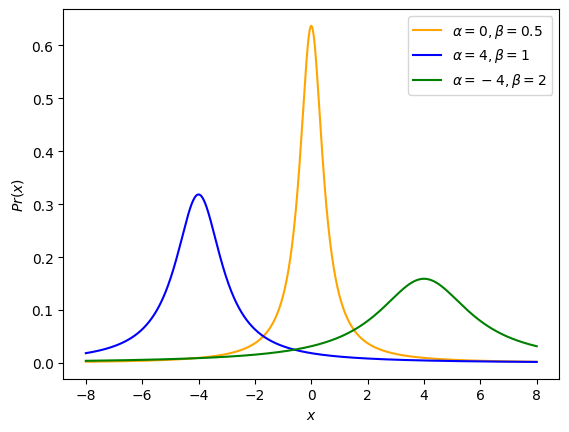

In [5]:

def p(x, alpha, beta):
    return beta/(np.pi*(beta**2+(x-alpha)**2))

x = np.linspace(-8, 8, 1000)
plt.plot(x, p(x, 0, 0.5), label=r'$\alpha=0, \beta=0.5$', c='orange')
plt.plot(x, p(x, -4, 1), label=r'$\alpha=4, \beta=1$', c = 'blue')
plt.plot(x, p(x, 4, 2), label=r'$\alpha=-4, \beta=2$', c='green')

# Add vertical lines at the peaks


plt.xlabel('$x$')
plt.ylabel('$Pr(x)$')
plt.legend()
plt.savefig('../report/figs/cauchy_distribution.png')


/Users/vishaljain/s2_cw/src/models.py:63: RuntimeWarning: divide by zero encountered in log
  log_likelihood = sum([np.log(cauchy(x, alpha, beta)) for x in data])
/Users/vishaljain/s2_cw/src/models.py:63: RuntimeWarning: invalid value encountered in log
  log_likelihood = sum([np.log(cauchy(x, alpha, beta)) for x in data])


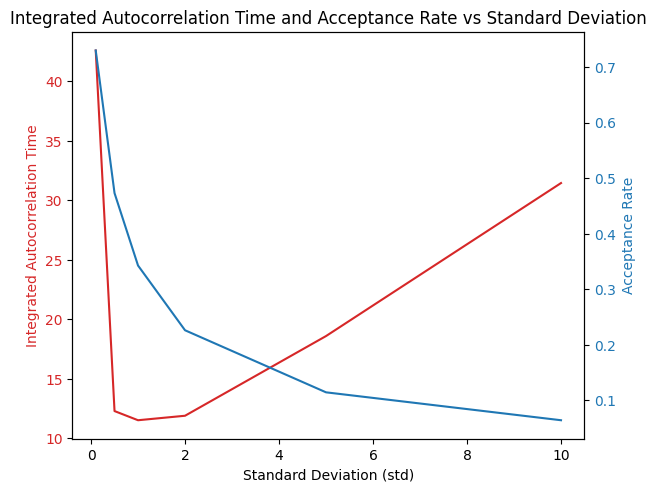

<Figure size 640x480 with 0 Axes>

In [6]:
"""Tuning the covariance matrix"""
a,b = -np.max(X), np.max(X)
c,d = 0, 50
stds = [0.1, 0.5, 1, 2, 5, 10]
cov_Qs = [np.eye(2) * std for std in stds]
all_acceptances = []
all_max_taus = []
n_chains = range(10)
n_samples = 10000
for i in n_chains:
    # draw x0 from the prior
    alpha = np.random.uniform(a, b)
    beta = np.random.uniform(c, d)
    x0 = np.asarray([0,0])
    acceptances = []
    max_taus = []
    for cov_Q in cov_Qs:
        samples, acceptance = metropolis_sampler(lambda theta: log_p(theta, X, uniform_2d_prior), x0, n_samples, cov_Q)
        acceptances.append(acceptance)
        try:
            max_tau = max(integrated_time(samples[:,0]), integrated_time(samples[:,1]))
            max_taus.append(max_tau)
        except AutocorrError:
            pass

    all_acceptances.append(acceptances)
    all_max_taus.append(max_taus)

# Calculate the mean autocorrelation time and acceptance rate for each standard deviation across all chains
mean_max_taus = [np.mean([chain[i] for chain in all_max_taus]) for i in range(len(stds))]
mean_acceptances = [np.mean([chain[i] for chain in all_acceptances]) for i in range(len(stds))]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Standard Deviation (std)')
ax1.set_ylabel('Integrated Autocorrelation Time', color=color)
ax1.plot(stds, mean_max_taus, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Acceptance Rate', color=color)
ax2.plot(stds, mean_acceptances, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Integrated Autocorrelation Time and Acceptance Rate vs Standard Deviation')
plt.show()
plt.savefig('../report/figs/autocorrelation_time_vs_std.png', dpi=300)


In [6]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


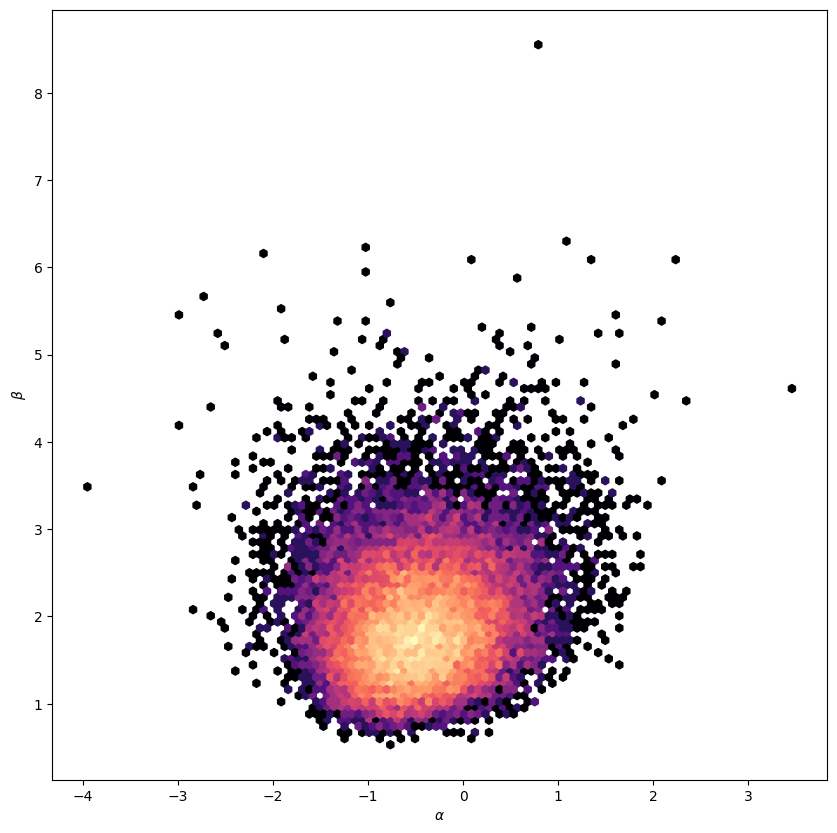

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter

# Joint plot
iid_samples = np.load('x_samples.npy')

# Load your iid_samples data
iid_samples = np.load('x_samples.npy')

# Extract alpha and beta samples
alpha_samples = iid_samples[:, 0]
beta_samples = iid_samples[:, 1]

# Set up the figure and the grid layout
fig, ax  = plt.subplots(figsize=(10, 10))

# Main scatter plot
ax.hexbin(alpha_samples, beta_samples, gridsize=100, cmap='magma', bins='log')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$')

plt.show()

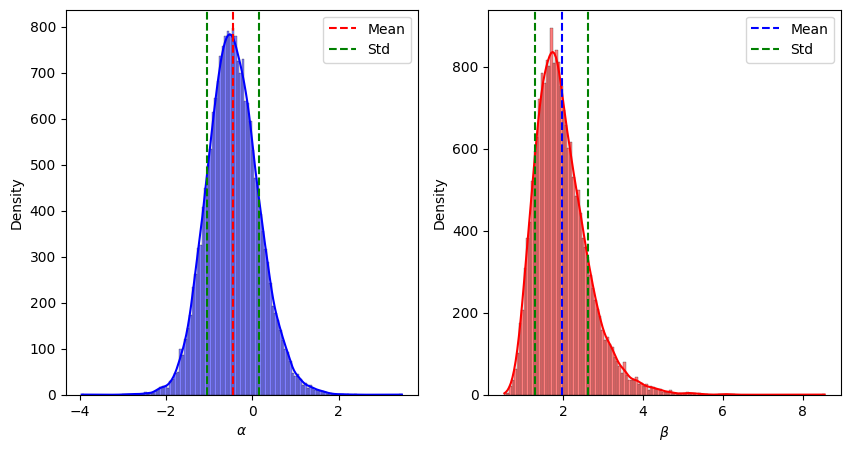

In [24]:
# 1D marginals
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Alpha marginal
sns.histplot(alpha_samples, kde=True, ax=ax[0], color='blue')
ax[0].set_xlabel(r'$\alpha$')
ax[0].set_ylabel('Density')

# Overlay mean and std
mean_alpha = np.mean(alpha_samples)
std_alpha = np.std(alpha_samples)
ax[0].axvline(mean_alpha, color='red', linestyle='--', label='Mean')
ax[0].axvline(mean_alpha + std_alpha, color='green', linestyle='--', label='Std')
ax[0].axvline(mean_alpha - std_alpha, color='green', linestyle='--')
ax[0].legend()


# Beta marginal
sns.histplot(beta_samples, kde=True, ax=ax[1], color='red')
ax[1].set_xlabel(r'$\beta$')
ax[1].set_ylabel('Density')

# Overlay mean and std
mean_beta = np.mean(beta_samples)
std_beta = np.std(beta_samples)
ax[1].axvline(mean_beta, color='blue', linestyle='--', label='Mean')
ax[1].axvline(mean_beta + std_beta, color='green', linestyle='--', label='Std')
ax[1].axvline(mean_beta - std_beta, color='green', linestyle='--')
ax[1].legend()

plt.show()
